In [1]:
import pickle
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *

import matplotlib.pyplot as plt

In [2]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]

hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  2**1, standard_encode)

In [3]:
hamHO.pauliStrings

1.0*I^0*I^1 + 0.5*I^0*Z^1 - 0.5*I^1*Z^0

In [4]:
from qiskit.aqua.operators import I,X,Y,Z, PauliTrotterEvolution
from qiskit import QuantumCircuit, transpile

In [5]:
operator1 = ((1.5*I^I).exp_i())
operator2 = ((-0.5*I^Z).exp_i())
operator3 = ((0.5*Z^I).exp_i())

II


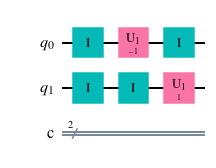

In [6]:

trotter_op1 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator1)
trotter_op2 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator2)
trotter_op3 = PauliTrotterEvolution(trotter_mode='suzuki').convert(operator3)
print(operator1)
qc = QuantumCircuit(2,2)
qc.append(trotter_op1, [0,1])
qc.append(trotter_op2, [0,1])
qc.append(trotter_op3, [0,1])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z','id']).draw('mpl')

In [7]:
1/16

0.0625

In [8]:
h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  2**2, standard_encode)
print(hamAHO.harmonic)
print()
print(hamAHO.fermionic)
print()
print(hamAHO.pauliStrings)
#print()
#print(np.linalg.eig(hamAHO.hamMatrix))

0.5*a*ad + 0.25*a*ad*a*ad + 0.0625*a*ad*a*ad*a*ad + 0.0625*a*ad*a*ad*a**2 + 0.0625*a*ad*a*ad**2*a + 0.0625*a*ad*a*ad**3 + 0.25*a*ad*a**2 + 0.0625*a*ad*a**2*ad*a + 0.0625*a*ad*a**2*ad**2 + 0.0625*a*ad*a**3*ad + 0.0625*a*ad*a**4 + 0.25*a*ad**2*a + 0.0625*a*ad**2*a*ad*a + 0.0625*a*ad**2*a*ad**2 + 0.0625*a*ad**2*a**2*ad + 0.0625*a*ad**2*a**3 + 0.25*a*ad**3 + 0.0625*a*ad**3*a*ad + 0.0625*a*ad**3*a**2 + 0.0625*a*ad**4*a + 0.0625*a*ad**5 + 0.25*a**2*ad*a + 0.0625*a**2*ad*a*ad*a + 0.0625*a**2*ad*a*ad**2 + 0.0625*a**2*ad*a**2*ad + 0.0625*a**2*ad*a**3 + 0.25*a**2*ad**2 + 0.0625*a**2*ad**2*a*ad + 0.0625*a**2*ad**2*a**2 + 0.0625*a**2*ad**3*a + 0.0625*a**2*ad**4 + 0.25*a**3*ad + 0.0625*a**3*ad*a*ad + 0.0625*a**3*ad*a**2 + 0.0625*a**3*ad**2*a + 0.0625*a**3*ad**3 + 0.25*a**4 + 0.0625*a**4*ad*a + 0.0625*a**4*ad**2 + 0.0625*a**5*ad + 0.0625*a**6 + 0.5*ad*a + 0.25*ad*a*ad*a + 0.0625*ad*a*ad*a*ad*a + 0.0625*ad*a*ad*a*ad**2 + 0.0625*ad*a*ad*a**2*ad + 0.0625*ad*a*ad*a**3 + 0.25*ad*a*ad**2 + 0.0625*ad*a*ad*

In [9]:
import math
math.sqrt(2)

1.4142135623730951

In [10]:
hamHO.bmatrix

array([[0.500000000000000, 0],
       [0, 1.50000000000000]], dtype=object)

In [11]:
np.linalg.eig(np.matrix(hamHO.bmatrix,dtype=float))

(array([0.5, 1.5]),
 matrix([[1., 0.],
         [0., 1.]]))

In [12]:
np.linalg.eig(getHamMat(hamHO.pauliStrings))

(array([1.+0.j, 2.+0.j, 0.+0.j, 1.+0.j]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))

In [13]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]
    
cuts = [n for n in range(2**2,2**4+1)]
eigs = []

for n in cuts:
    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(getHamMat(hamHO.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    eigs.append(np.sort(eigVals))


In [14]:
print(len(eigs[0]))
print(len(eigs[1]))

8
16


In [15]:
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

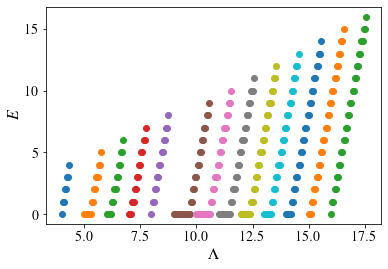

In [16]:
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
#plt.show()
plt.savefig('PLOTS/HO_spectra.pdf')

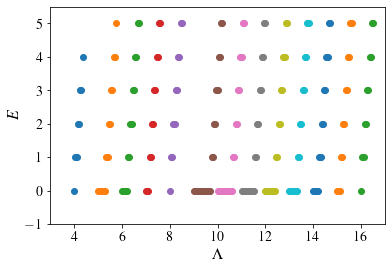

In [17]:
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.xlim(3,17)
plt.ylim(-1,5.5)
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
#plt.show()
plt.savefig('PLOTS/HO_spectra_zoom.pdf')

In [18]:
eigs[0]

array([0., 1., 1., 2., 2., 3., 3., 4.])

In [19]:
cuts = [n for n in range(2**2,2**3+1)]
eigs = []

h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

for n in cuts:
    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:0},
                  n, standard_encode)

    eigSys = np.linalg.eig(getHamMat(ham.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    eigs.append(np.sort(eigVals))

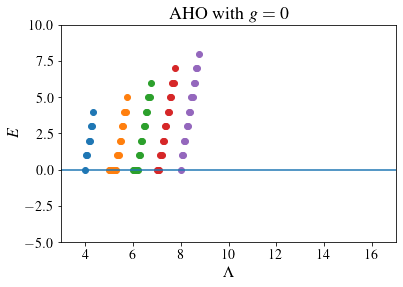

In [20]:
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.xlim(3,17)
plt.ylim(-5,10)
plt.title('AHO with $g=0$')
#plt.show()
plt.savefig('PLOTS/aho_g0.0.pdf')

In [21]:
cuts = [n for n in range(2**2,2**4+1)]
qubitEigs = []
hamEigs = []

for n in cuts:
    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(getHamMat(ham.pauliStrings))
    eigVals = [en.real for en in eigSys[0]]
    qubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    hamEigs.append(np.sort(eigVals))

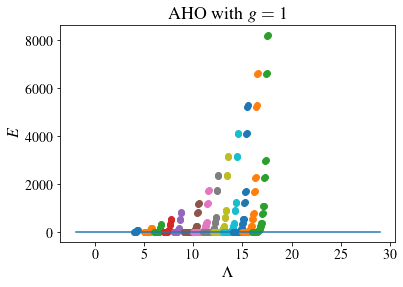

In [22]:
eigs=qubitEigs
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.title('AHO with $g=1$')
#plt.show()
plt.savefig('PLOTS/aho_g1.0.pdf')

<ipython-input-30-3a1035b0274d>:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-0.05,0.21)


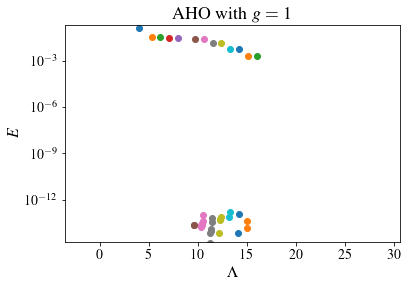

In [30]:
eigs=qubitEigs
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.yscale('log')
plt.ylim(-0.05,0.21)
plt.title('AHO with $g=1$')
plt.savefig('PLOTS/aho_g1.0_zoom.pdf')

In [41]:
qubitEigs[12]

array([1.83029849e-03, 1.68720122e+00, 1.70732190e+00, 4.37401524e+00,
       4.41418952e+00, 7.76596507e+00, 7.94769938e+00, 1.23737466e+01,
       1.55392089e+01, 2.23264623e+01, 2.80518338e+01, 3.70114181e+01,
       6.48981985e+01, 7.75413666e+01, 1.08552639e+02, 1.23939075e+02,
       2.41232814e+02, 2.61810455e+02, 3.63855960e+02, 3.87766690e+02,
       7.72064707e+02, 8.03262342e+02, 1.07392833e+03, 1.10905748e+03,
       2.25639928e+03, 2.30194206e+03, 2.94732376e+03, 2.99741317e+03,
       6.57894977e+03, 6.64516415e+03, 8.15513246e+03, 8.22656441e+03])

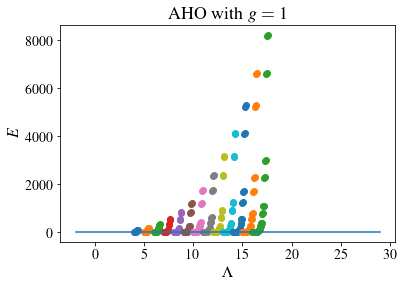

In [23]:
eigs=hamEigs
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.title('AHO with $g=1$')
#plt.show()
plt.savefig('PLOTS/aho_g1.0.pdf')

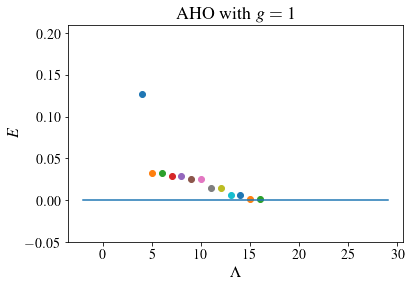

In [28]:
eigs=hamEigs
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.ylim(-0.05,0.21)
plt.title('AHO with $g=1$')
plt.savefig('PLOTS/aho_g1.0_zoom.pdf')


In [25]:
eigs[0]

array([ 0.12682403,  2.08341082,  3.323419  ,  7.31797807, 32.24817597,
       41.29158918, 81.301581  , 94.30702193])

In [26]:
eigs[12]

array([1.83029849e-03, 1.68720122e+00, 1.70732190e+00, 4.37401524e+00,
       4.41418952e+00, 7.76596507e+00, 7.94769938e+00, 1.23737466e+01,
       1.55392089e+01, 2.23264623e+01, 2.80518338e+01, 3.70114181e+01,
       6.48981985e+01, 7.75413666e+01, 1.08552639e+02, 1.23939075e+02,
       2.41232814e+02, 2.61810455e+02, 3.63855960e+02, 3.87766690e+02,
       7.72064707e+02, 8.03262342e+02, 1.07392833e+03, 1.10905748e+03,
       2.25639928e+03, 2.30194206e+03, 2.94732376e+03, 2.99741317e+03,
       6.57894977e+03, 6.64516415e+03, 8.15513246e+03, 8.22656441e+03])

<ipython-input-29-a8b14197bb28>:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-0.05,0.21)


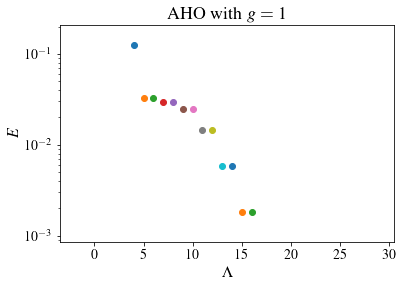

In [29]:
eigs=hamEigs
x=[[j+4+n*0.05 for n in range(len(eigs[j]))] for j in range(len(eigs))]
y=[[d for d in eig] for eig in eigs]

for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
plt.yscale('log')
plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')
plt.ylim(-0.05,0.21)
plt.title('AHO with $g=1$')
plt.savefig('PLOTS/aho_g1.0_zoom.pdf')